# Exploring Dandiset 001195: Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State

This notebook explores Dandiset 001195, focusing on how to access and visualize some of the intracellular electrophysiology data.

**Important Note:** This notebook was generated by an AI and has not been fully verified. Users should exercise caution when interpreting the code or results and are encouraged to consult the raw data and original analysis pipelines for definitive conclusions.


## Dandiset Overview

Dandiset 001195 contains supporting data for the publication "Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State". This dataset includes in vivo calcium imaging data with supporting behavioral videos and ex vivo patch-clamp electrophysiology recordings aimed at understanding the role of dorsal raphe dopamine projections.

You can find more information about this Dandiset on the DANDI archive: https://dandiarchive.org/dandiset/001195/0.250408.1733


## Notebook Summary

This notebook will cover:
- Loading the Dandiset using the DANDI API.
- Listing assets within the Dandiset.
- Loading a specific NWB file containing intracellular electrophysiology data.
- Examining the structure and metadata of the NWB file.
- Loading and visualizing intracellular current clamp response and stimulus data.


## Required Packages

The following packages are required to run this notebook. It is assumed that these packages are already installed in your Python environment.

*   `dandi`
*   `pynwb`
*   `h5py`
*   `remfile`
*   `numpy`
*   `matplotlib`


## Loading the Dandiset and Listing Assets

We can connect to the DANDI archive and access the Dandiset using the `dandiapi` client. We will then list the first few assets in the Dandiset to get an idea of the file organization.

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001195", "0.250408.1733")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State
Dandiset URL: https://dandiarchive.org/dandiset/001195/0.250408.1733

First 5 assets:
- sub-23/sub-23_ses-20150324T134114_slice-slice-1_cell-C1_icephys.nwb (ID: a243dde4-c270-42a9-8550-025f5ffcd5a7)
- sub-23/sub-23_ses-20150324T161217_slice-slice-2_cell-B3_icephys.nwb (ID: 8c1155c8-4531-4625-9515-e399f1b5f7bc)
- sub-235/sub-235_ses-20200921T142415_slice-slice-1_cell-C3_icephys.nwb (ID: da3bb7c6-cd57-4c1a-92aa-2be38419088c)
- sub-23/sub-23_ses-20150324T154615_slice-slice-2_cell-B2_icephys.nwb (ID: 85bf2dfb-0e2f-442d-b11c-e0d38bcc8783)
- sub-23/sub-23_ses-20150324T152016_slice-slice-2_cell-B1_icephys.nwb (ID: 1bbc22a8-059d-4cd2-80c6-e1c20969ab19)


## Loading an NWB file

We will now load a specific NWB file containing intracellular electrophysiology data. For this example, we'll use the file at: `sub-23/sub-23_ses-20150324T134114_slice-slice-1_cell-C1_icephys.nwb`.

The URL for this asset is: https://api.dandiarchive.org/api/assets/a243dde4-c270-42a9-8550-025f5ffcd5a7/download/

In [2]:
# Load the specific NWB file
url = "https://api.dandiarchive.org/api/assets/a243dde4-c270-42a9-8550-025f5ffcd5a7/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Display some basic metadata from the NWB file
print(f"NWB file session description: {nwb.session_description}")
print(f"NWB file identifier: {nwb.identifier}")
print(f"NWB file session start time: {nwb.session_start_time}")
print(f"Experimenter: {nwb.experimenter}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Subject species: {nwb.subject.species}")

NWB file session description: episodic stimulation
NWB file identifier: a18b081c-3b63-45df-b702-fc3640aef3de
NWB file session start time: 2015-03-24 13:41:14-07:00
Experimenter: ('Matthews, Gillian',)
Subject ID: 23
Subject species: Mus musculus


## NWB File Contents Overview

This NWB file contains intracellular electrophysiology data. Key data are stored within the `acquisition` and `stimulus` sections. Based on the `nwb-file-info` output, the `acquisition` contains `CurrentClampSeries` and `VoltageClampSeries`, and the `stimulus` contains `CurrentClampStimulusSeries` and `VoltageClampStimulusSeries`. There are also `icephys_electrodes` and `devices` defined.

The file contains responses to various stimulus protocols, indicated by the names of the `CurrentClampSeries` and `VoltageClampSeries` objects (e.g., `current_clamp-response-01-ch-0`, `voltage_clamp-response-22-ch-0`).

You can explore this NWB file interactively on Neurosift: https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/a243dde4-c270-42a9-8550-025f5ffcd5a7/download/&dandisetId=001195&dandisetVersion=0.250408.1733


## Visualizing Current Clamp Data

Let's visualize one of the current clamp response and stimulus series. We will plot `current_clamp-response-01-ch-0` and its corresponding stimulus `stimulus-01-ch-0`.

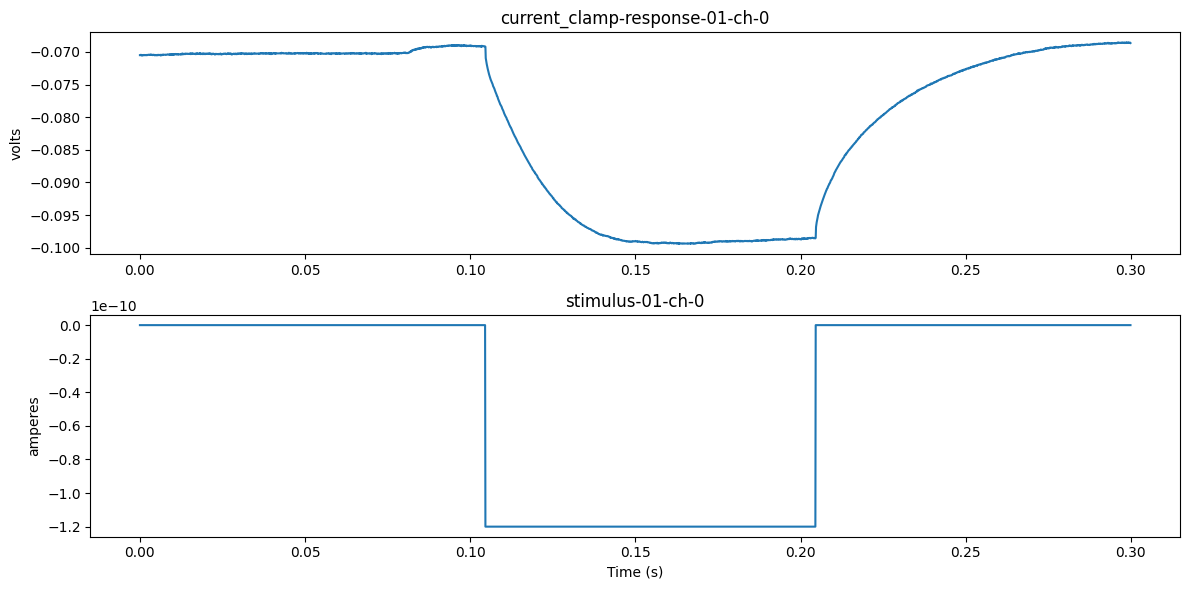

In [3]:
# Get the acquisition and stimulus data
acquisition = nwb.acquisition
stimulus = nwb.stimulus

# Select a specific current clamp series for plotting
response_series_name = "current_clamp-response-01-ch-0"
stimulus_series_name = "stimulus-01-ch-0"

response_series = acquisition[response_series_name]
stimulus_series = stimulus[stimulus_series_name]

# Get the data and time vector
# Load only the first 3000 data points to keep it lightweight
response_data = response_series.data[0:] * response_series.conversion
stimulus_data = stimulus_series.data[0:] * stimulus_series.conversion

# Assuming uniform sampling rate and starting time 0 for simplicity,
# create a time vector. If time stamps are provided and non-uniform,
# they should be used instead.
if response_series.timestamps is not None:
    time = response_series.timestamps[0:]
else:
    rate = response_series.rate
    starting_time = response_series.starting_time
    time = np.arange(response_data.shape[0]) / rate + starting_time

# Plot the data
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time, response_data)
plt.ylabel(f"{response_series.unit}")
plt.title(f"{response_series_name}")

plt.subplot(2, 1, 2)
plt.plot(time, stimulus_data)
plt.xlabel("Time (s)")
plt.ylabel(f"{stimulus_series.unit}")
plt.title(f"{stimulus_series_name}")

plt.tight_layout()
plt.show()

## Visualizing Another Current Clamp Data

Let's visualize another pair of current clamp response and stimulus series to see a different epoch. This time, let's plot `current_clamp-response-05-ch-0` and its corresponding stimulus `stimulus-05-ch-0`.

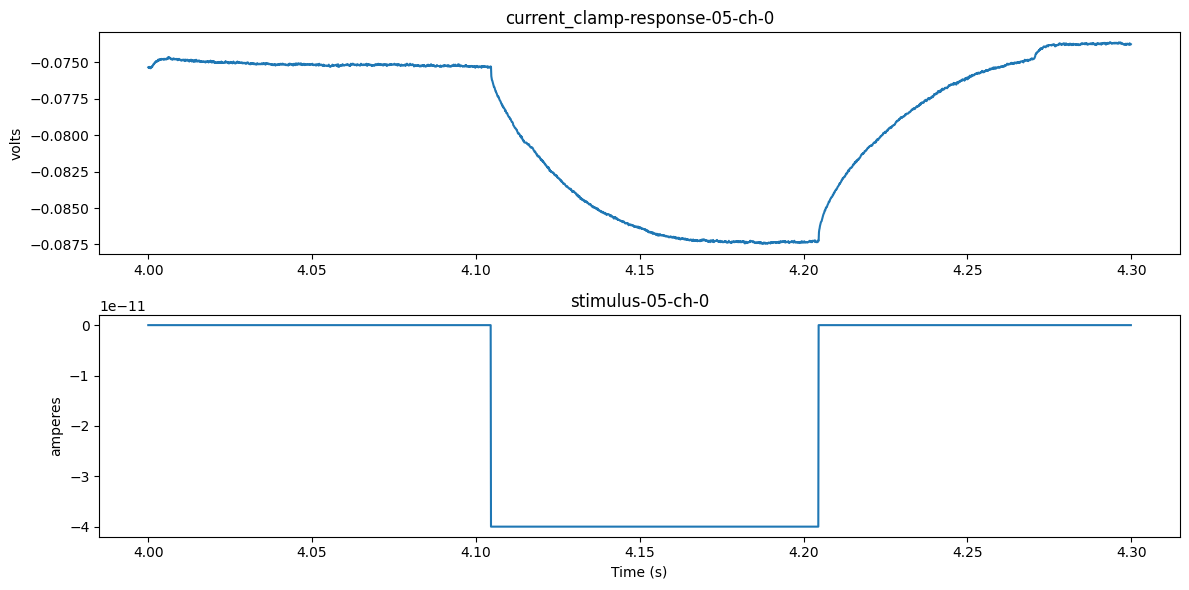

In [4]:
# Select another current clamp series for plotting
response_series_name_2 = "current_clamp-response-05-ch-0"
stimulus_series_name_2 = "stimulus-05-ch-0"

response_series_2 = acquisition[response_series_name_2]
stimulus_series_2 = stimulus[stimulus_series_name_2]

# Get the data and time vector
# Load only the first 3000 data points to keep it lightweight
response_data_2 = response_series_2.data[0:] * response_series_2.conversion
stimulus_data_2 = stimulus_series_2.data[0:] * stimulus_series_2.conversion

# Assuming uniform sampling rate and starting time for simplicity
if response_series_2.timestamps is not None:
    time_2 = response_series_2.timestamps[0:]
else:
    rate_2 = response_series_2.rate
    starting_time_2 = response_series_2.starting_time
    time_2 = np.arange(response_data_2.shape[0]) / rate_2 + starting_time_2

# Plot the data
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time_2, response_data_2)
plt.ylabel(f"{response_series_2.unit}")
plt.title(f"{response_series_name_2}")

plt.subplot(2, 1, 2)
plt.plot(time_2, stimulus_data_2)
plt.xlabel("Time (s)")
plt.ylabel(f"{stimulus_series_2.unit}")
plt.title(f"{stimulus_series_name_2}")

plt.tight_layout()
plt.show()

## Summarizing Findings and Future Directions

This notebook demonstrated how to load a Dandiset, list its assets, and access intracellular electrophysiology data from a specific NWB file using the DANDI API and PyNWB. We visualized two different epochs of current clamp response and stimulus data.

Future directions for analysis could include:
*   Exploring other data in the NWB file, such as voltage clamp series or histological images (if available and suitable for notebook analysis).
*   Analyzing the relationship between stimulus and response across different trials.
*   Comparing electrophysiological properties across different cells or experimental conditions within the Dandiset.
*   Investigating how the electrophysiology data correlates with behavioral or imaging data available in other NWB files within the Dandiset.

Remember to consult the full metadata and relevant publications for a complete understanding of the data and experimental context.


In [5]:
# Close the NWB file
io.close()
remote_file.close()